In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
univ=pd.read_csv('/content/drive/MyDrive/University_data_Clustering_2.csv')

In [4]:
univ.head(100)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornel,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [5]:
#Normalization function
from sklearn.preprocessing import StandardScaler
univ2=univ.iloc[:,1:]
scalling=StandardScaler()
df_norm=scalling.fit_transform(univ2.iloc[:,1:])

In [8]:
#Normalized dataframe (Considering the numerical part of data)
df_norm


array([[ 0.6575195 , -0.88986682,  0.07026045, -0.33141256,  0.82030265],
       [ 1.23521235, -0.73465749, -1.68625071,  2.56038138, -0.64452351],
       [-0.76045386,  1.02438157, -0.93346022, -0.16712136, -1.65863393],
       [-0.02520842, -0.78639393, -0.18066972,  0.29164871,  0.14422904],
       [ 0.34241431, -0.32076595,  0.07026045, -0.39084607,  0.36958691],
       [ 0.6575195 , -0.83813038, -0.68253005,  0.33778044,  0.93298158],
       [ 0.71003703, -0.47597528, -0.18066972,  0.29695528,  0.93298158],
       [-0.13024348, -0.78639393, -0.18066972, -0.51381683,  0.59494478],
       [ 0.76255456, -1.30375836, -0.43159988,  0.85874344,  1.15833946],
       [-0.07772595,  0.24833493, -1.43532055,  2.21481798,  0.0315501 ],
       [ 0.92010716, -0.47597528, -0.68253005,  0.52938275,  0.48226584],
       [ 0.44744937, -0.01034729, -0.43159988,  0.04698077,  0.25690797],
       [ 0.23737924,  0.14486204,  0.07026045, -0.86787073,  0.82030265],
       [-2.02087462,  0.76569936,  1.3

#How to find Optimum number of cluster
#The K -Mean algorythm aims to choose centroid that minimise the inertia

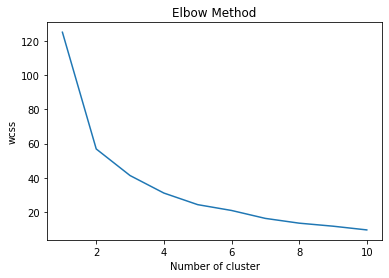

In [9]:
from pandas.core.common import random_state
wcss=[]
for i in range(1,11):
  #kmeans=KMeans(init='k-means++', n_clusters=i, n_init=10).fit(df_norm)
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)  
plt.title("Elbow Method")
plt.xlabel('Number of cluster')
plt.ylabel('wcss')
plt.show()
  

In [10]:
#km = KMeans(init='k-means++', n_clusters=i, n_init=10).fit(df_norm)

#Build Cluster Algorithms

In [11]:
from sklearn.cluster import KMeans
cluster_new=KMeans((4),random_state=234)
cluster_new.fit(df_norm)
cluster_new.labels_

array([1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 2, 1,
       2, 3, 1], dtype=int32)

#Assign Cluster to the Data set

In [12]:
univ['cluster_new']=cluster_new.labels_

In [13]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornel,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,0


These are Standrized value

In [14]:
cluster_new.cluster_centers_

array([[ 0.5787432 , -0.24316128, -1.56078563,  2.38759968, -0.3064867 ],
       [ 0.47545872, -0.57944816, -0.31449914,  0.20196544,  0.64001635],
       [-0.09085533,  0.7010288 ,  0.32119061, -0.71757117, -0.56001431],
       [-1.98148647,  1.59348244,  1.63857398, -1.23359906, -1.68680366]])

In [15]:
univ.groupby('cluster_new').agg(['mean']).reset_index()


,cluster_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1360.000000,87.500000,34.50,6.500000,61133.000000,84.00
1,1,1319.333333,85.533333,28.00,11.466667,30242.466667,92.40
2,2,1226.250000,74.750000,52.75,14.000000,17246.250000,81.75
3,3,1061.500000,38.750000,70.00,19.250000,9953.000000,71.75


In [16]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,cluster_new
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,1
4,Cornel,1280,83,33,13,21864,90,1
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,1
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,0
